In [293]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [294]:
from PIL import Image
import os
import pandas as pd
import pylab as pl
from sklearn.decomposition import PCA

In [295]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [296]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images('./images') # load images in the specified directory

In [297]:
X = pd.DataFrame([im.histogram() for im in images])

In [298]:
# my assignment starts here

In [299]:
# part1

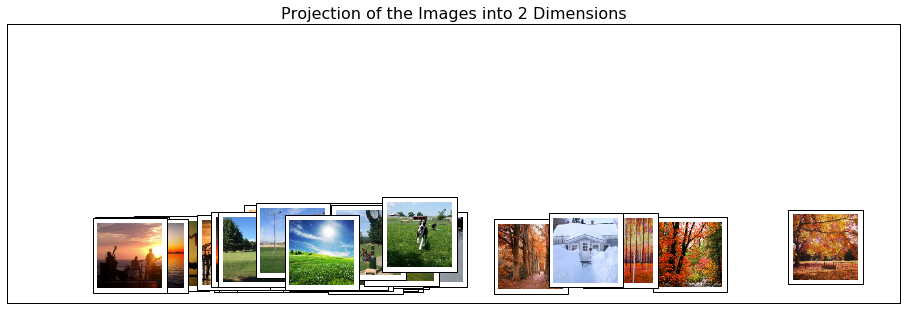

In [300]:
plot_image_space(images, X, title="Projection of the Images into 2 Dimensions")

In [301]:
# part2
# What does it mean for two images to be close together 
# in this plot? 
### Answer: It shows the they are in same type defined by 
# the variance or the method cannot differentiate them.
# What does it mean for two images to be far apart?
### Answer: It shows they are in very different type defined
# by the variance.
# Do images corresponding to one of the seasons tend to 
# group together more closely than others? Why might this 
# be the case?
### Answer: Yes. Because the variances we use to differentiate
# should group same type together. 

In [ ]:
# part3

In [302]:
pca = PCA(n_components=2)

In [303]:
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [304]:
print(pca.explained_variance_ratio_) 

[ 0.24632315  0.10808704]


In [305]:
newX = pca.transform(X) 

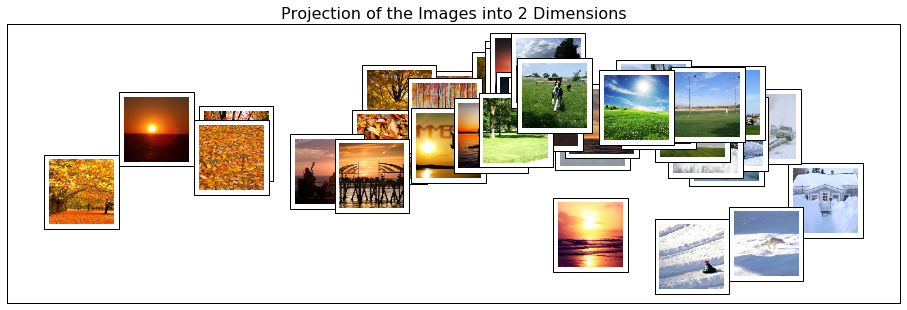

In [306]:
plot_image_space(images, newX, title="Projection of the Images into 2 Dimensions")